### Import Libraries and Set up

In [1]:
# Libraries for data processing and math 
import pandas as pd
import numpy as np

# Library for data visualization
import matplotlib.pyplot as plt

# Library for file path manipulation 
import os

# Libraries for machine learning algorithms 
import xgboost as xgb
from sklearn.inspection import permutation_importance
# import shap not using this due to time constraint 

# Set seed to control randomness
np.random.seed(156)

# Set feautures to find importances of 
feature_set = ['PM2.5', 'PM10', 'SO2', 'CO', 'NO2', 'O3', 'HUM', 'PRES', 'WSPD', 'TEMP', 'ACTV']

### Feature Selection: Cluster 1-3 Overall

In [2]:
# Load the data and train the XGBoost models
root = os.path.dirname(os.getcwd())
data_dir = os.path.join(root, 'data')
### Cluster 1 Overall ###
c1_overall_path = os.path.join(data_dir, 'time_cluster_1.csv')
c1_overall = pd.read_csv(c1_overall_path)
c1_overall_data = c1_overall[feature_set]
c1_overall_target = c1_overall['Case']
### Cluster 2 Overall ###
c2_overall_path = os.path.join(data_dir, 'time_cluster_2.csv')
c2_overall = pd.read_csv(c2_overall_path)
c2_overall_data = c2_overall[feature_set]
c2_overall_target = c2_overall['Case']
### Cluster 3 Overall ###
c3_overall_path = os.path.join(data_dir, 'time_cluster_3.csv')
c3_overall = pd.read_csv(c3_overall_path)
c3_overall_data = c3_overall[feature_set]
c3_overall_target = c3_overall['Case']
### Cluster 1 Overall Hyperparams ###
max_depth1 = 2
min_child_weight1 = 8
n_estimators1 = 50
learning_rate1 = 0.1
### Cluster 2 Overall Hyperparams ###
max_depth2 = 3
min_child_weight2 = 8
n_estimators2 = 50
learning_rate2 = 0.1
### Cluster 3 Overall Hyperparams ###
max_depth3 = 5
min_child_weight3 = 3
n_estimators3 = 50
learning_rate3 = 0.1
### Train model for Cluster 1 ###
xgb_c1_overall = xgb.XGBRegressor(max_depth=max_depth1,
                                  min_child_weight=min_child_weight1,
                                  n_estimators=n_estimators1,
                                  learning_rate=learning_rate1)
xgb_c1_overall.fit(c1_overall_data, c1_overall_target);
### Train model for Cluster 2 ###
xgb_c2_overall = xgb.XGBRegressor(max_depth=max_depth2,
                                  min_child_weight=min_child_weight2,
                                  n_estimators=n_estimators2,
                                  learning_rate=learning_rate2)
xgb_c2_overall.fit(c2_overall_data, c2_overall_target);
### Train model for Cluster 3 ###
xgb_c3_overall = xgb.XGBRegressor(max_depth=max_depth3,
                                  min_child_weight=min_child_weight3,
                                  n_estimators=n_estimators3,
                                  learning_rate=learning_rate3)
xgb_c3_overall.fit(c3_overall_data, c3_overall_target);

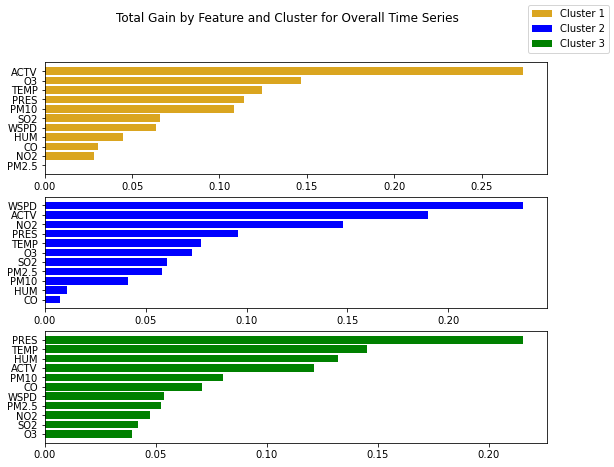

In [3]:
# Plot Total Gain by Feature 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,7))
fig.suptitle('Total Gain by Feature and Cluster for Overall Time Series')
# Create plot for Cluster 1 
sorted_idx_gain_c1_overall = xgb_c1_overall.feature_importances_.argsort()
ax1.barh(c1_overall_data.columns[sorted_idx_gain_c1_overall],
         xgb_c1_overall.feature_importances_[sorted_idx_gain_c1_overall],
         color='goldenrod', label='Cluster 1')
# Create plot for Cluster 2
sorted_idx_gain_c2_overall = xgb_c2_overall.feature_importances_.argsort()
ax2.barh(c2_overall_data.columns[sorted_idx_gain_c2_overall],
         xgb_c2_overall.feature_importances_[sorted_idx_gain_c2_overall],
         color='Blue', label='Cluster 2')
# Create plot for Cluster 3
sorted_idx_gain_c3_overall = xgb_c3_overall.feature_importances_.argsort()
ax3.barh(c3_overall_data.columns[sorted_idx_gain_c3_overall],
         xgb_c3_overall.feature_importances_[sorted_idx_gain_c3_overall],
         color='Green', label='Cluster 3')
fig.legend();

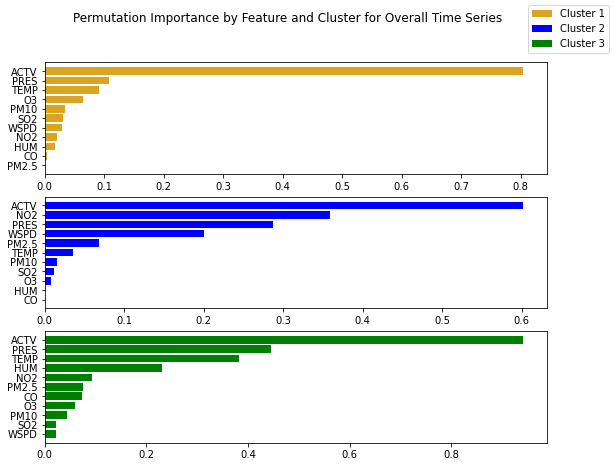

In [4]:
# Plot Permutation Importance by Feature 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,7))
fig.suptitle('Permutation Importance by Feature and Cluster for Overall Time Series')
# Create plot for Cluster 1 
perm_importance_c1_overall = permutation_importance(xgb_c1_overall, c1_overall_data, c1_overall_target)
sorted_idx_perm_c1_overall = perm_importance_c1_overall.importances_mean.argsort()
ax1.barh(c1_overall_data.columns[sorted_idx_perm_c1_overall],
         perm_importance_c1_overall.importances_mean[sorted_idx_perm_c1_overall],
         color='goldenrod', label='Cluster 1')
# Create plot for Cluster 2 
perm_importance_c2_overall = permutation_importance(xgb_c2_overall, c2_overall_data, c2_overall_target)
sorted_idx_perm_c2_overall = perm_importance_c2_overall.importances_mean.argsort()
ax2.barh(c2_overall_data.columns[sorted_idx_perm_c2_overall],
         perm_importance_c2_overall.importances_mean[sorted_idx_perm_c2_overall],
         color='blue', label='Cluster 2')
# Create plot for Cluster 3 
perm_importance_c3_overall = permutation_importance(xgb_c3_overall, c3_overall_data, c3_overall_target)
sorted_idx_perm_c3_overall = perm_importance_c3_overall.importances_mean.argsort()
ax3.barh(c3_overall_data.columns[sorted_idx_perm_c3_overall],
         perm_importance_c3_overall.importances_mean[sorted_idx_perm_c3_overall],
         color='green', label='Cluster 3')
fig.legend();

### Feature Selection: Cluster 1-3 Postpeak

In [5]:
# Load the data and train the XGBoost models
root = os.path.dirname(os.getcwd())
data_dir = os.path.join(root, 'data')
### Cluster 1 Overall ###
c1_postpeak_path = os.path.join(data_dir, 'time_cluster_1_postpeak.csv')
c1_postpeak = pd.read_csv(c1_postpeak_path)
c1_postpeak_data = c1_postpeak[feature_set]
c1_postpeak_target = c1_postpeak['Case']
### Cluster 2 Overall ###
c2_postpeak_path = os.path.join(data_dir, 'time_cluster_2_postpeak.csv')
c2_postpeak = pd.read_csv(c2_postpeak_path)
c2_postpeak_data = c2_postpeak[feature_set]
c2_postpeak_target = c2_postpeak['Case']
### Cluster 3 Overall ###
c3_postpeak_path = os.path.join(data_dir, 'time_cluster_3_postpeak.csv')
c3_postpeak = pd.read_csv(c3_postpeak_path)
c3_postpeak_data = c3_postpeak[feature_set]
c3_postpeak_target = c3_postpeak['Case']
### Cluster 1 Postpeak Hyperparams ###
max_depth1 = 4
min_child_weight1 = 8
n_estimators1 = 50
learning_rate1 = 0.1
### Cluster 2 Postpeak Hyperparams ###
max_depth2 = 3
min_child_weight2 = 8
n_estimators2 = 50
learning_rate2 = 0.1
### Cluster 3 Postpeak Hyperparams ###
max_depth3 = 5
min_child_weight3 = 6
n_estimators3 = 50
learning_rate3 = 0.1
### Train model for Cluster 1 ###
xgb_c1_postpeak = xgb.XGBRegressor(max_depth=max_depth1,
                                  min_child_weight=min_child_weight1,
                                  n_estimators=n_estimators1,
                                  learning_rate=learning_rate1)
xgb_c1_postpeak.fit(c1_postpeak_data, c1_postpeak_target);
### Train model for Cluster 2 ###
xgb_c2_postpeak = xgb.XGBRegressor(max_depth=max_depth2,
                                  min_child_weight=min_child_weight2,
                                  n_estimators=n_estimators2,
                                  learning_rate=learning_rate2)
xgb_c2_postpeak.fit(c2_postpeak_data, c2_postpeak_target);
### Train model for Cluster 3 ###
xgb_c3_postpeak = xgb.XGBRegressor(max_depth=max_depth3,
                                  min_child_weight=min_child_weight3,
                                  n_estimators=n_estimators3,
                                  learning_rate=learning_rate3)
xgb_c3_postpeak.fit(c3_postpeak_data, c3_postpeak_target);

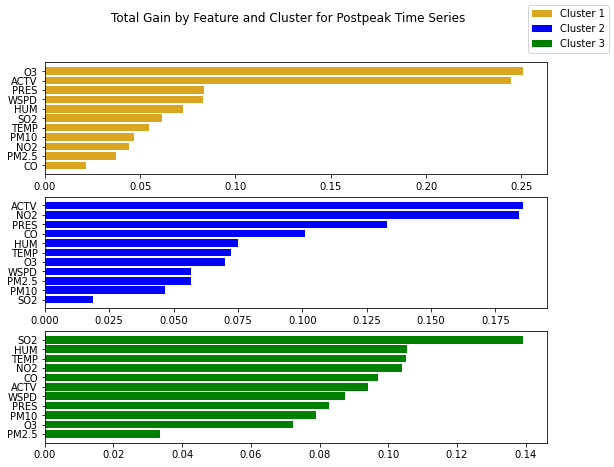

In [6]:
# Plot Total Gain by Feature 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,7))
fig.suptitle('Total Gain by Feature and Cluster for Postpeak Time Series')
# Create plot for Cluster 1 
sorted_idx_gain_c1_postpeak = xgb_c1_postpeak.feature_importances_.argsort()
ax1.barh(c1_postpeak_data.columns[sorted_idx_gain_c1_postpeak],
         xgb_c1_postpeak.feature_importances_[sorted_idx_gain_c1_postpeak],
         color='goldenrod', label='Cluster 1')
# Create plot for Cluster 2
sorted_idx_gain_c2_postpeak = xgb_c2_postpeak.feature_importances_.argsort()
ax2.barh(c2_postpeak_data.columns[sorted_idx_gain_c2_postpeak],
         xgb_c2_postpeak.feature_importances_[sorted_idx_gain_c2_postpeak],
         color='blue', label='Cluster 2')
# Create plot for Cluster 3 
sorted_idx_gain_c3_postpeak = xgb_c3_postpeak.feature_importances_.argsort()
ax3.barh(c3_postpeak_data.columns[sorted_idx_gain_c3_postpeak],
         xgb_c3_postpeak.feature_importances_[sorted_idx_gain_c3_postpeak],
         color='green', label='Cluster 3')
fig.legend();

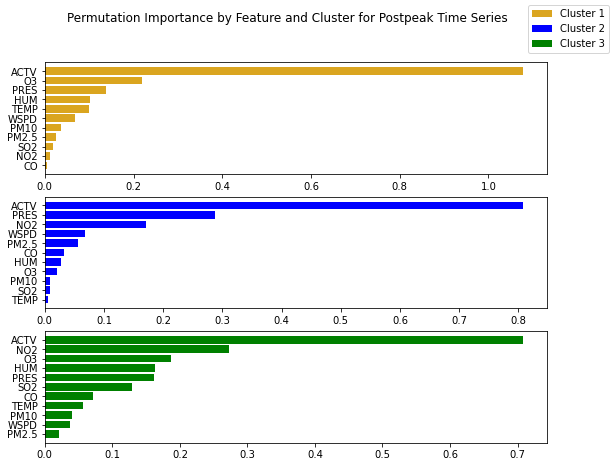

In [7]:
# Plot Permutation Importance by Feature 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,7))
fig.suptitle('Permutation Importance by Feature and Cluster for Postpeak Time Series')
# Create plot for Cluster 1 
perm_importance_c1_postpeak = permutation_importance(xgb_c1_postpeak, c1_postpeak_data, c1_postpeak_target)
sorted_idx_perm_c1_postpeak = perm_importance_c1_postpeak.importances_mean.argsort()
ax1.barh(c1_postpeak_data.columns[sorted_idx_perm_c1_postpeak],
         perm_importance_c1_postpeak.importances_mean[sorted_idx_perm_c1_postpeak],
         color='goldenrod', label='Cluster 1')
# Create plot for Cluster 2 
perm_importance_c2_postpeak = permutation_importance(xgb_c2_postpeak, c2_postpeak_data, c2_postpeak_target)
sorted_idx_perm_c2_postpeak = perm_importance_c2_postpeak.importances_mean.argsort()
ax2.barh(c2_postpeak_data.columns[sorted_idx_perm_c2_postpeak],
         perm_importance_c2_postpeak.importances_mean[sorted_idx_perm_c2_postpeak],
         color='blue', label='Cluster 2')
# Create plot for Cluster 3 
perm_importance_c3_postpeak = permutation_importance(xgb_c3_postpeak, c3_postpeak_data, c3_postpeak_target)
sorted_idx_perm_c3_postpeak = perm_importance_c3_postpeak.importances_mean.argsort()
ax3.barh(c3_postpeak_data.columns[sorted_idx_perm_c3_postpeak],
         perm_importance_c3_postpeak.importances_mean[sorted_idx_perm_c3_postpeak],
         color='green', label='Cluster 3')
fig.legend();

### Feature Selection: Cluster 1-3 Spread

In [8]:
# Load the data and train the XGBoost models
root = os.path.dirname(os.getcwd())
data_dir = os.path.join(root, 'data')
### Cluster 1 Overall ###
c1_spread_path = os.path.join(data_dir, 'time_cluster_1_spread.csv')
c1_spread = pd.read_csv(c1_spread_path)
c1_spread_data = c1_spread[feature_set]
c1_spread_target = c1_spread['Case']
### Cluster 2 Overall ###
c2_spread_path = os.path.join(data_dir, 'time_cluster_2_spread.csv')
c2_spread = pd.read_csv(c2_spread_path)
c2_spread_data = c2_spread[feature_set]
c2_spread_target = c2_spread['Case']
### Cluster 3 Overall ###
c3_spread_path = os.path.join(data_dir, 'time_cluster_3_spread.csv')
c3_spread = pd.read_csv(c3_spread_path)
c3_spread_data = c3_spread[feature_set]
c3_spread_target = c3_spread['Case']
### Cluster 1 Spread Hyperparams ###
max_depth1 = 4
min_child_weight1 = 9
n_estimators1 = 50
learning_rate1 = 0.1
### Cluster 2 Postpeak Hyperparams ###
max_depth2 = 4
min_child_weight2 = 9
n_estimators2 = 50
learning_rate2 = 0.1
### Cluster 3 Postpeak Hyperparams ###
max_depth3 = 4
min_child_weight3 = 8
n_estimators3 = 50
learning_rate3 = 0.1
### Train model for Cluster 1 ###
xgb_c1_spread = xgb.XGBRegressor(max_depth=max_depth1,
                                  min_child_weight=min_child_weight1,
                                  n_estimators=n_estimators1,
                                  learning_rate=learning_rate1)
xgb_c1_spread.fit(c1_spread_data, c1_spread_target);
### Train model for Cluster 2 ###
xgb_c2_spread = xgb.XGBRegressor(max_depth=max_depth2,
                                  min_child_weight=min_child_weight2,
                                  n_estimators=n_estimators2,
                                  learning_rate=learning_rate2)
xgb_c2_spread.fit(c2_spread_data, c2_spread_target);
### Train model for Cluster 3 ###
xgb_c3_spread = xgb.XGBRegressor(max_depth=max_depth3,
                                  min_child_weight=min_child_weight3,
                                  n_estimators=n_estimators3,
                                  learning_rate=learning_rate3)
xgb_c3_spread.fit(c3_spread_data, c3_spread_target);

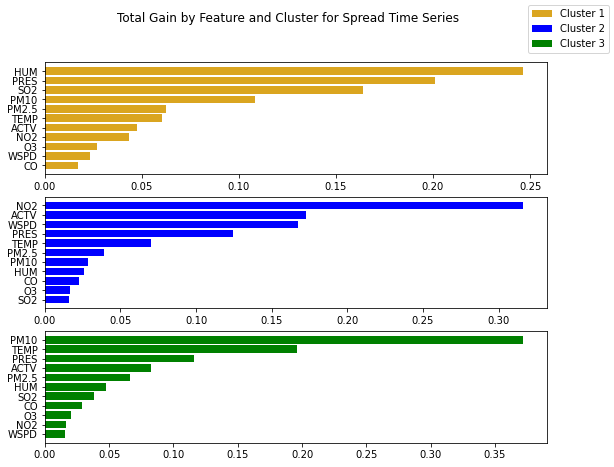

In [9]:
# Plot Total Gain by Feature 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,7))
fig.suptitle('Total Gain by Feature and Cluster for Spread Time Series')
# Create plot for Cluster 1 
sorted_idx_gain_c1_spread = xgb_c1_spread.feature_importances_.argsort()
ax1.barh(c1_spread_data.columns[sorted_idx_gain_c1_spread],
         xgb_c1_spread.feature_importances_[sorted_idx_gain_c1_spread],
         color='goldenrod', label='Cluster 1')
# Create plot for Cluster 2
sorted_idx_gain_c2_spread = xgb_c2_spread.feature_importances_.argsort()
ax2.barh(c2_spread_data.columns[sorted_idx_gain_c2_spread],
         xgb_c2_spread.feature_importances_[sorted_idx_gain_c2_spread],
         color='blue', label='Cluster 2')
# Create plot for Cluster 3 
sorted_idx_gain_c3_spread = xgb_c3_spread.feature_importances_.argsort()
ax3.barh(c3_spread_data.columns[sorted_idx_gain_c3_spread],
         xgb_c3_spread.feature_importances_[sorted_idx_gain_c3_spread],
         color='green', label='Cluster 3')
fig.legend();

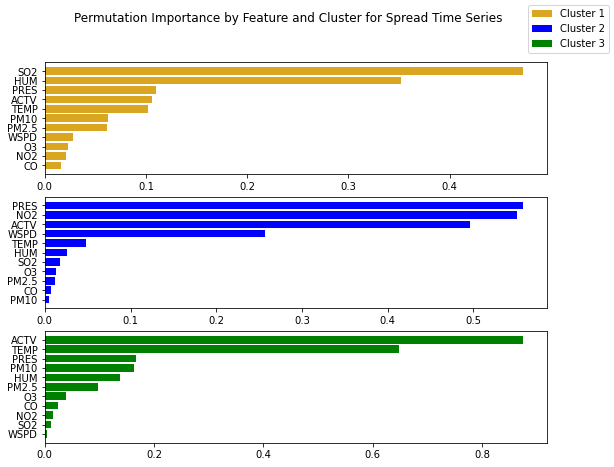

In [10]:
# Plot Permutation Importance by Feature 
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,7))
fig.suptitle('Permutation Importance by Feature and Cluster for Spread Time Series')
# Create plot for Cluster 1 
perm_importance_c1_spread = permutation_importance(xgb_c1_spread, c1_spread_data, c1_spread_target)
sorted_idx_perm_c1_spread = perm_importance_c1_spread.importances_mean.argsort()
ax1.barh(c1_spread_data.columns[sorted_idx_perm_c1_spread],
         perm_importance_c1_spread.importances_mean[sorted_idx_perm_c1_spread],
         color='goldenrod', label='Cluster 1')
# Create plot for Cluster 2 
perm_importance_c2_spread = permutation_importance(xgb_c2_spread, c2_spread_data, c2_spread_target)
sorted_idx_perm_c2_spread = perm_importance_c2_spread.importances_mean.argsort()
ax2.barh(c2_spread_data.columns[sorted_idx_perm_c2_spread],
         perm_importance_c2_spread.importances_mean[sorted_idx_perm_c2_spread],
         color='blue', label='Cluster 2')
# Create plot for Cluster 3 
perm_importance_c3_spread = permutation_importance(xgb_c3_spread, c3_spread_data, c3_spread_target)
sorted_idx_perm_c3_spread = perm_importance_c3_spread.importances_mean.argsort()
ax3.barh(c3_spread_data.columns[sorted_idx_perm_c3_spread],
         perm_importance_c3_spread.importances_mean[sorted_idx_perm_c3_spread],
         color='green', label='Cluster 3')
fig.legend();